<a href="https://colab.research.google.com/github/damjan18/ml-product-reviews-project/blob/main/notebook/product_reviews_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading and inspecting the dataset

Before diving into analysis, we first need to load the dataset and take a look at its structure.

In this step, we will:
- Load the CSV file from Github
- Check how many rows and columns we have
- Display the first few rows
- Review data types and basic metadata for each column

This will help ensure that dataset is correctly loaded and ready for further exploration.

In [3]:
import pandas as pd

# load dataset from github
url = "https://raw.githubusercontent.com/damjan18/ml-product-reviews-project/main/data/product_reviews_full.csv"

df = pd.read_csv(url)

# print shape (number of rows and columns)
print("Dataset shape (rows, columns):", df.shape)

#Show first five rows
print("\nFirst 5 rows:")
display(df.head())

#Show column data types and non-null counts
print("\nDataset info:")
df.info()

Dataset shape (rows, columns): (171380, 6)

First 5 rows:


,review_uuid,product_name,product_price,review_title,review_text,sentiment
0,31b07b9a-4567-4db1-81f6-1bcef33b3e7b,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Super!,great cooler excellent air flow and for this p...,positive
1,1cb2b4b5-9805-4c2d-9393-6b1382cb7c53,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Awesome,best budget 2 fit cooler nice cooling,positive
2,f64165f0-29a2-4cfb-8b15-13c0c893e54d,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Fair,the quality is good but the power of air is de...,positive
3,e442e083-a343-4052-b015-41e531e52d3e,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Useless product,very bad product its a only a fan,negative
4,f4abefb8-22f0-4672-af73-2aa2954b24e0,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Fair,ok ok product,Neutral



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171380 entries, 0 to 171379
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   review_uuid    171380 non-null  object
 1   product_name   171380 non-null  object
 2   product_price  170954 non-null  object
 3   review_title   171379 non-null  object
 4   review_text    171379 non-null  object
 5   sentiment      166369 non-null  object
dtypes: object(6)
memory usage: 7.8+ MB


# Checking for missing values
Missing can couse problems during model training or analysis.
Here, we will:
- Count the number of missing values per column
- Visualize missing values using heatmap

This will help us identify any columns that require cleaning or imputation.

In [4]:
# Count missing values per column
print("Missing values per column: ")
print(df.isna().sum())

Missing values per column: 
review_uuid         0
product_name        0
product_price     426
review_title        1
review_text         1
sentiment        5011
dtype: int64


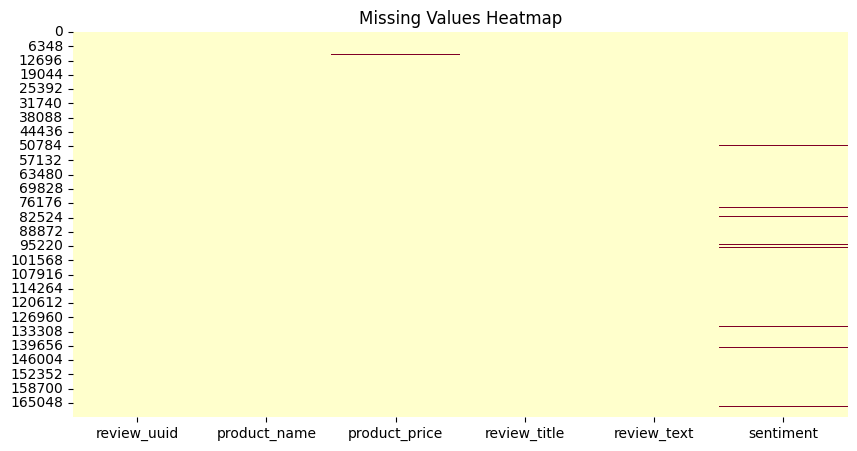

In [6]:
# Visualize missing data with seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()

# Sentiment distribution

Let's check how many reviews are labeled as positive vs negative vs neutral.
This helps us:
- Understand the balance between classes
- Detect if the dataset is skewed

In [7]:
# Count occurences of each sentiment label
sentiment_counts = df['sentiment'].value_counts()

# Print counts
print("Sentiment distribution (counts):")
print(sentiment_counts)

Sentiment distribution (counts):
sentiment
positive    85537
negative    32369
Positive    22361
Negative    12392
neutral     10508
Neutral      3202
Name: count, dtype: int64


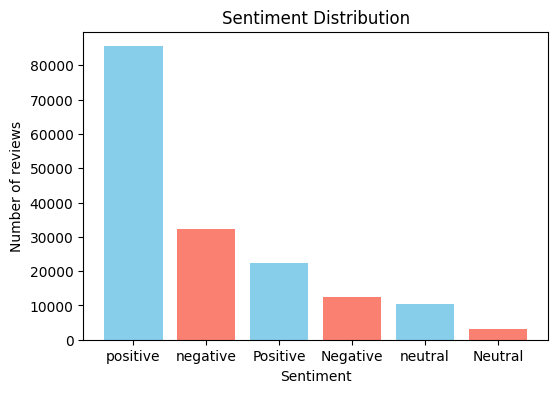

In [9]:
# Plot sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(sentiment_counts.index, sentiment_counts.values,color=['skyblue', 'salmon'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of reviews")
plt.show()

# Exploring the 'product_price' column

Before we can use price data in any meaningful way, we need to understand how it is stored and formatted.
In this section, we will:
- Check data type of the product_price column
- Preview a few sample values
 - Identify the most common price entries
 - Detect non-numeric or problematic values such as "Free", "N/A" or corupted symbols.

 This is an important part of data cleaning. Even if value looks lika a number it may still be stored asd a string and cause problems during numeric analysis or modeling.

In [14]:
# Check the data type of the 'product_price' column
print("Data type of product_price column:", df['product_price'].dtype)

# Display the firest ten values from the column
print("\nFirst 10 values in product_price column:")
print(df['product_price'].head(10))

# Show the 20 most frquent values in the column
print("\nTop 20 most frequent values in product_price column:")
print(df['product_price'].value_counts().head(20))

# Check for known non-numeric text values
problematic_values = ['Free', 'Not Available', 'N/A', 'None', '-', 'free', 'unknown', 'Unavailable']
# Identify rows containing these specific non-numeric values
mask_problematic = df['product_price'].astype(str).str.strip().isin(problematic_values)
df_problematic = df[mask_problematic]
print(f'\nFound {len(df_problematic)} rows with problematic textual values:')
display(df_problematic[['product_price']].drop_duplicates())

# Find and display some of the non-numeric values
price_clean = df['product_price'].astype(str).str.strip()
price_numeric = pd.to_numeric(price_clean, errors='coerce')

invalid_prices = df[price_numeric.isna()]
print("Number of non-numeric prices:", len(invalid_prices))
display(invalid_prices[['product_price']].drop_duplicates().head(20))

Data type of product_price column: object

First 10 values in product_price column:
0    48.18
1    48.18
2    48.18
3    48.18
4    48.18
5    48.18
6    48.18
7    48.18
8    48.18
9    48.18
Name: product_price, dtype: object

Top 20 most frequent values in product_price column:
product_price
2.63        4483
5.41        2648
$5.41       2577
19.27       2575
$2.63       2499
42.16       2242
168.66      2175
8.42        2103
6.01        1857
373.48      1824
3.6         1778
18.06       1710
$19.27      1671
$3.60       1608
96.37       1496
$168.66     1461
3.0         1395
$6.01       1359
3.24        1333
2.4         1321
Name: count, dtype: int64

Found 0 rows with problematic textual values:


,product_price


Number of non-numeric prices: 68858


,product_price
22,NaN
34279,$6.86
34512,$2.76
34553,$6.95
35245,$4.35
36212,$19.27
36613,$21.67
36622,$7.22
36753,$9.63
36766,$7.82


# Removing missing values

We already analyzed missing data in the previous step.
Now we will simply drop all rows that contain missing values,
and check the new shape and count missing values per column per column.

In [15]:
# Drop all rows with missing values
df = df.dropna()

# Display the new shape of dataset
print("New dataset shape:", df.shape)

# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

New dataset shape: (165960, 6)
Missing values per column:
review_uuid      0
product_name     0
product_price    0
review_title     0
review_text      0
sentiment        0
dtype: int64
